Let’s explore the most commonly used date and time data types, along with their formats:

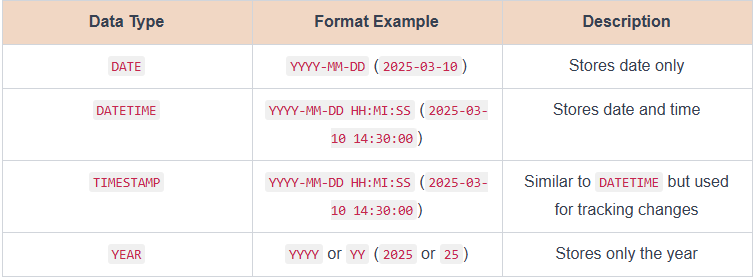

**Difference between DATETIME and TIMESTAMP**:

* `DATETIME` stores a fixed date and time, independent of time zones. This makes it ideal for scenarios where the exact time is important, such as birthdates or event schedules. It keeps the value fixed as entered, so the date and time stay the same, no matter the time zone or server settings.

* `TIMESTAMP` stores date-time values in `UTC`. It is commonly used for tracking changes, logging, and automatic updates. One important feature of `TIMESTAMP` is that it can automatically update itself to the current time whenever a row is modified, which makes it useful for tracking changes over time. It takes up less storage (4 bytes) compared to `DATETIME` (8 bytes) and has a smaller date range (1970– 2038 vs. `DATETIME`’s 1000–999).


## Create `Student` table with `date_of_birth` and `enrollment_time` field

```sql
# Create and use the University database
Create database University;
Use University;

# Creating the students table
CREATE TABLE students (
    student_id INT PRIMARY KEY,
    full_name VARCHAR(255),
    date_of_birth DATE,
    enrollment_time DATETIME
);

# Using the DESCRIBE command to check the structure of the 'students' table
Describe students;
```

| Field | Type | Null | Key | Default | Extra |
| --- | --- | --- | --- | --- | --- |
| student_id | int(11) |NO | PRI | NULL	|
| full_name | varchar(255) | YES|  | NULL |
| date_of_birth | date | YES|  | NULL |
| enrollment_time | datetime | YES|  | NULL |

> SQL provides the `DATE` data type to store dates in the `YYYY-MM-DD` format and the `DATETIME` data type to store time in `YYYY-MM-DD HH:MI:SS` format. This ensures consistency and allows easy retrieval and manipulation.

## Insert data into the `student`s table

We must follow the `DATE` and `DATETIME` format when inserting the date and time.

```sql
INSERT INTO students (student_id, full_name, date_of_birth, enrollment_time) VALUES
(1, 'Alice Johnson', '2002-05-15', '2024-01-10 09:30:00'),
(2, 'Bob Smith', '2001-11-23', '2024-02-15 11:00:00'),
(3, 'Charlie Brown', '2003-07-08', '2024-03-05 14:45:00'),
(4, 'David Lee', '2000-09-30', '2024-04-12 16:20:00'),
(5, 'Eve Carter', '1999-12-12', '2024-05-01 08:00:00');
```

---

```sql
Select * from students;
```

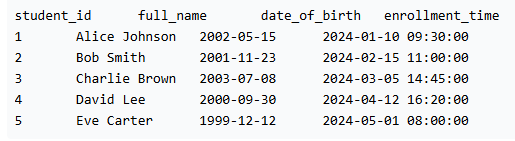


We have successfully inserted the dates into the tables. 


## Extract Date time information

Now, let’s discuss the `DATE` and `TIME` functions that are commonly used to extract the details regarding `DAY`, `MONTH`, `YEAR`, `WEEK`, `SECOND` and `TIME` etc.

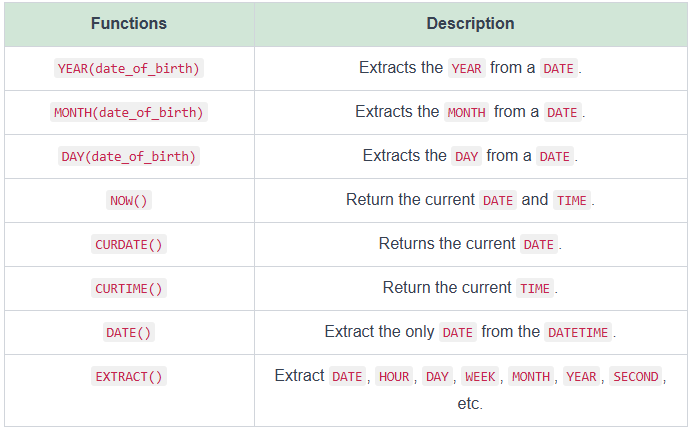

> **Note**: The values returned by functions like NOW(), CURDATE(), CURTIME(), DATE(), and EXTRACT() (when used with DATETIME or TIMESTAMP) are based on the server's timezone setting.


Here are four hands-on tasks for you to practice SQL `DATE` and `TIME` functions:

1. Write a query to display `student_id`, `full_name`, `date_of_birth`, `YEAR(date_of_birth)`, `MONTH(date_of_birth)`, and `DAY(date_of_birth)`.

```sql
SELECT student_id, full_name, date_of_birth, 
    YEAR(date_of_birth) AS birth_year, 
    MONTH(date_of_birth) AS birth_month, 
    DAY(date_of_birth) AS birth_day
FROM students;
```

2. Write a query using `NOW()`, `CURDATE()`, and `CURTIME()` to display the current date and time, current date only, and current time only.

```sql
SELECT NOW() AS current_datetime, 
    CURDATE() AS current_date_value, 
    CURTIME() AS current_time_value;
```

3. Write a query to extract the `date` from the `enrollment_time` column using the `DATE()` function.

```sql
SELECT student_id, full_name, enrollment_time, 
    DATE(enrollment_time) AS enrollment_date
FROM students;
```

4. Write a query to extract the following details: `HOUR`, `MINUTE`, and `SECOND` from `enrollment_time WEEK` and `YEAR`.

```sql
SELECT student_id, full_name, enrollment_time, 
    EXTRACT(HOUR FROM enrollment_time) AS hour_enrolled, 
    EXTRACT(MINUTE FROM enrollment_time) AS minute_enrolled, 
    EXTRACT(SECOND FROM enrollment_time) AS second_enrolled, 
    EXTRACT(WEEK FROM enrollment_time) AS enrollment_week, 
    EXTRACT(YEAR FROM enrollment_time) AS enrollment_year
FROM students;
```

## Calculate Employee Age

**Employees** table

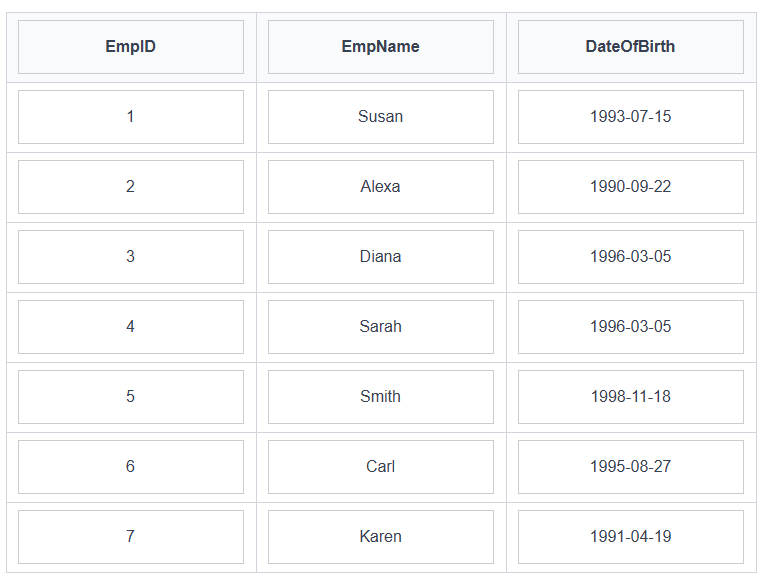

You are provided with a table named `Employees` that contains the following columns:
* `EmpID`: Unique identifier for each employee
* `EmpName`: Job title of the employee
* `DateOfBirth`: Date of joining of an employee

**Write an SQL query to find out the age of each employee.**

Expected output:

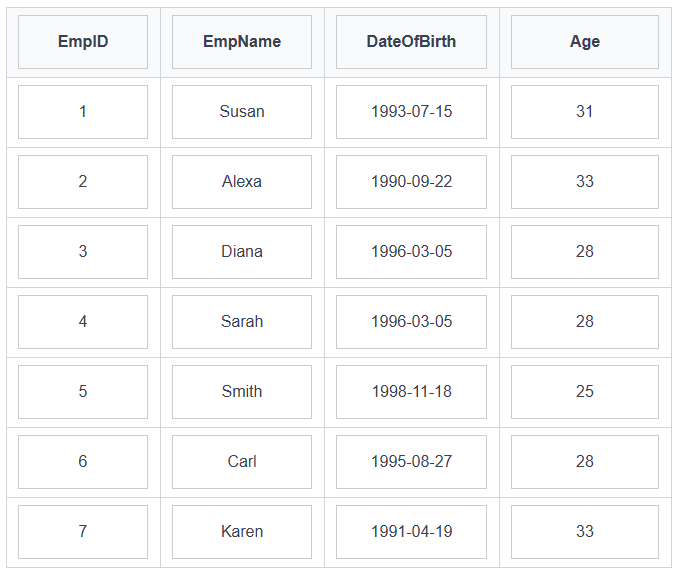

```mysql
SELECT *, FLOOR(TIMESTAMPDIFF(DAY, DateOfBirth, NOW()) / 365) AS Age
FROM   Employees;
```

* The `TIMESTAMPDIFF()` function takes three variables: the unit of time (e.g., `YEAR`, `MONTH`, `DAY`), and two datetime expressions.
* It calculates the difference between the datetime expressions in the specified unit. 
* The `FLOOR()` function rounds a numeric value down to the nearest integer that is less than or equal to the given value. 
* We can also use `YEAR` instead of `DAY` in `TIMESTAMPDIFF` and then we will not have to divide it by `365`.